1.840616445015211e-05
19999


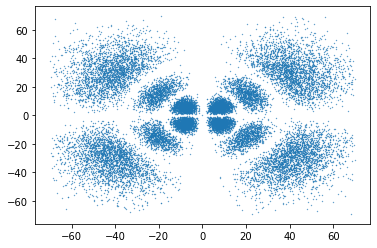

In [1]:
"""
File name: orbital_generator.py
Author: Amit K Das (@akdpsi)
Created: 01/11/2023
Version: --
Description: This code is for visualizing the cross section of the orbital just for a check. The data generated by
this part is not used in Blender. The algo follows reference [1].
"""


import numpy as np
import matplotlib.pyplot as pl
from scipy import special as sp

#The equation for the orbital probability density. Please refer to Reference [1].
def rho(r, q, n, l, m):
    N_r = np.sqrt(sp.factorial(n-l-1)*4.0/(np.power(n,4.0)*np.power(sp.factorial(n+l),1.0)))
    r = 2.0*r/n
    R = np.exp(-r/2.0)*np.power(r, l)*sp.genlaguerre(n-l-1, 2*l+1)(r)
    N_q = np.sqrt((2*l+1)*sp.factorial((l-np.abs(m)))/(4.0*np.pi*sp.factorial(l+np.abs(m))))
    Q = sp.lpmv(np.abs(m), l, np.cos(q))
    return np.power(N_r*R*np.abs(Q)*N_q, 2.0)

a0 = 1.0
n_a = 70
N = 30000000
n_p = 20000
n, l, m = 6,3,2 #The quantum numbers.

#find the maximum probability
r_max = np.sqrt(2.0*np.power(n_a*a0,2.0))
R = np.linspace(0.0, r_max, n_a*25)

Q = np.linspace(0.0, np.pi/2.0, 180)
M_i = np.zeros(180)
i=0
for q in Q:
    M_i[i] = np.max(rho(R,q, n, l, m))
    i+=1
M=1.05*np.max(M_i)
print(M)

p = 0
rnd_x = np.random.default_rng().uniform(-n_a*a0,n_a*a0,N)
rnd_y = np.random.default_rng().uniform(-n_a*a0,n_a*a0,N)
#rnd_z = np.random.default_rng().uniform(-n_a*a0,n_a*a0,N)

r = np.sqrt(np.power(rnd_x,2.0)+np.power(rnd_y,2.0))
q = np.arccos(rnd_y/r)
rho_xyz = rho(r,q, n, l, m)
rnd_M = np.random.default_rng().uniform(0,M,N)
#rnd_M = np.random.default_rng().uniform(0,M,N)
#arrays to store the points
x = np.zeros(n_p)
y = np.zeros(n_p)
#z = np.zeros(n_p)
for i in range(N):
    x_i, y_i = rnd_x[i], rnd_y[i]
    if rnd_M[i] <= rho_xyz[i]:
        x[p] = x_i
        y[p] = y_i
        p += 1
    if p+1 >= n_p:
        break
print(p)
data = np.zeros((p,2))
data[:,0] = x[0:p]
data[:,1] = y[0:p]
#data[:,2] = z[0:p]
pl.scatter(x,y,s=.1)
pl.show()
del rnd_x, rnd_y, rnd_M, x, y
#np.savetxt("orbital_xy_{:d},{:d},{:d}.csv".format(n,l,m), data, delimiter=",")

In [3]:
"""
File name: orbital_generator.py
Author: Amit K Das (@akdpsi)
Created: 01/11/2023
Version: --
Description: This code is for generating the data points for the orbital with a cross section cut to be used in Blender.
It takes a lot of memory, so if a large number of points are desired, the code can be run multiples times.
The algo follows reference [1].
"""



import numpy as np
from scipy import special as sp


#The equation for the orbital probability density. Please refer to Reference [1].
def rho(r, q, n, l, m):
    N_r = np.sqrt(sp.factorial(n-l-1)*4.0/(np.power(n,4.0)*np.power(sp.factorial(n+l),1.0)))
    r = 2.0*r/n
    R = np.exp(-r/2.0)*np.power(r, l)*sp.genlaguerre(n-l-1, 2*l+1)(r)
    N_q = np.sqrt((2*l+1)*sp.factorial((l-np.abs(m)))/(4.0*np.pi*sp.factorial(l+np.abs(m))))
    Q = sp.lpmv(np.abs(m), l, np.cos(q))
    return np.power(N_r*R*np.abs(Q)*N_q, 2.0)

a0 = 1.0
n_a = 70
N = 900000000
n_p = 1000000
n, l, m = 5, 2, 1
#find the maximum probability
r_max = np.sqrt(3.0*np.power(n_a*a0,2.0))
R = np.linspace(0.0, r_max, n_a*25)
Q = np.linspace(0.0, np.pi/2.0, 180)
M_i = np.zeros(180)
i=0
for q in Q:
    M_i[i] = np.max(rho(R,q, n, l, m))
    i+=1
M=1.05*np.max(M_i)
print(M)
p = 0
#rnd_x = np.random.default_rng().uniform(-n_a*a0,0,N)
rnd_x = np.random.default_rng().uniform(-n_a*a0,n_a*a0,N)
rnd_y = np.random.default_rng().uniform(-n_a*a0,n_a*a0,N)
rnd_z = np.random.default_rng().uniform(-n_a*a0,n_a*a0,N)
r = np.sqrt(np.power(rnd_x,2.0)+np.power(rnd_y,2.0)+np.power(rnd_z,2.0))
q = np.arccos(rnd_z/r)
rho_xyz = rho(r,q, n, l, m)
rnd_M = np.random.default_rng().uniform(0,M,N)
#arrays to store the points
x = np.zeros(n_p)
y = np.zeros(n_p)
z = np.zeros(n_p)

#suitable modify the following to cut an appropriate section
for i in range(N): 
    x_i, y_i, z_i = rnd_x[i], rnd_y[i], rnd_z[i]
    #if ((x_i > np.abs(y_i)*np.sqrt(3.0)) == False):  
    if ((x_i > 0.0 and z_i > 0.0) == False):
    #if (x_i < 0.0):
    #if ((x_i > np.abs(y_i)/np.tan(15*np.pi/180)) == False):
    #if ((x_i > np.abs(y_i) and z_i > 0.0) == False): 
    #if ((x_i > np.abs(y_i)) == False):
        if rnd_M[i] <= rho_xyz[i]:
            x[p] = x_i
            y[p] = y_i
            z[p] = z_i
            p += 1
        if p+1 >= n_p:
            break
print(p)
data = np.zeros((p,3))
data[:,0] = x[0:p]
data[:,1] = y[0:p]
data[:,2] = z[0:p]
np.savetxt("orbital_{:d},{:d},{:d}_cut.csv".format(n,l,m), data, delimiter=",")

7.008336126518767e-05
999999


In [2]:
"""
File name: orbital_generator.py
Author: Amit K Das (@akdpsi)
Created: 01/11/2023
Version: --
Description: This code is for generating the data points for the full orbital to be used in Blender.
It takes a lot of memory, so if a large number of points are desired, the code can be run multiples times.
The algo follows reference [1].
"""


import numpy as np
from scipy import special as sp

#The equation for the orbital probability density. Please refer to Reference [1].
def rho(r, q, n, l, m):
    N_r = np.sqrt(sp.factorial(n-l-1)*4.0/(np.power(n,4.0)*np.power(sp.factorial(n+l),1.0)))
    r = 2.0*r/n
    R = np.exp(-r/2.0)*np.power(r, l)*sp.genlaguerre(n-l-1, 2*l+1)(r)
    N_q = np.sqrt((2*l+1)*sp.factorial((l-np.abs(m)))/(4.0*np.pi*sp.factorial(l+np.abs(m))))
    Q = sp.lpmv(np.abs(m), l, np.cos(q))
    return np.power(N_r*R*np.abs(Q)*N_q, 2.0)

a0 = 1.0
n_a = 100
N = 600000000
n_p = 900000
n, l, m = 6, 1, 0
#find the maximum probability
r_max = np.sqrt(3.0*np.power(n_a*a0,2.0))
R = np.linspace(0.0, r_max, n_a*25)
Q = np.linspace(0.0, np.pi/2.0, 180)
M_i = np.zeros(180)
i=0
for q in Q:
    M_i[i] = np.max(rho(R,q, n, l, m))
    i+=1
M=1.05*np.max(M_i)
print(M)
p = 0
#rnd_x = np.random.default_rng().uniform(-n_a*a0,0,N)
rnd_x = np.random.default_rng().uniform(-n_a*a0,n_a*a0,N)
rnd_y = np.random.default_rng().uniform(-n_a*a0,n_a*a0,N)
rnd_z = np.random.default_rng().uniform(-n_a*a0,n_a*a0,N)
r = np.sqrt(np.power(rnd_x,2.0)+np.power(rnd_y,2.0)+np.power(rnd_z,2.0))
q = np.arccos(rnd_z/r)
rho_xyz = rho(r,q, n, l, m)
rnd_M = np.random.default_rng().uniform(0,M,N)
#arrays to store the points
x = np.zeros(n_p)
y = np.zeros(n_p)
z = np.zeros(n_p)
for i in range(N):
    x_i, y_i, z_i = rnd_x[i], rnd_y[i], rnd_z[i]
    
    if rnd_M[i] <= rho_xyz[i]:
        x[p] = x_i
        y[p] = y_i
        z[p] = z_i
        p += 1
    if p+1 >= n_p:
        break
print(p)
data = np.zeros((p,3))
data[:,0] = x[0:p]
data[:,1] = y[0:p]
data[:,2] = z[0:p]
np.savetxt("orbital_{:d},{:d},{:d}_full.csv".format(n,l,m), data, delimiter=",")
del rnd_x, rnd_y, rnd_z, rnd_M, x, y, z

0.000225715341604168
332317


In [3]:
#to generate sufficient number of points without memory limitation
data1 = np.loadtxt("orbital_6,1,0_full.csv", delimiter=",")
data2 = np.loadtxt("orbital_6,1,0_full2.csv", delimiter=",")
data3 = np.loadtxt("orbital_6,1,0_full3.csv", delimiter=",")
#data4 = np.loadtxt("orbital_7,1,0_full4.csv", delimiter=",")
#data5 = np.loadtxt("orbital_5,0,0_full5.csv", delimiter=",")
l1 = len(data1)
l2 = len(data2)
l3 = len(data3)
#l4 = len(data4)
#l5 = len(data5)
data = np.zeros((l1+l2+l3, 3))#+l4+l5, 3))
data[0:l1,:]=data1
data[l1:l1+l2,:]=data2
data[l1+l2:l1+l2+l3,:]=data3
#data[l1+l2+l3:l1+l2+l3+l4,:]=data4
#data[l1+l2+l3+l4:l1+l2+l3+l4+l5,:]=data5
np.savetxt("orbital_{:d},{:d},{:d}_fullF.csv".format(n,l,m), data, delimiter=",")